In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sys
import glob
import os
import peakutils
import datetime
import warnings
import logging
from jupyterthemes import jtplot

In [2]:
from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *

jtplot.style('default', grid=False)
logging.getLogger().setLevel(logging.CRITICAL)

plt.rcParams['errorbar.capsize'] = 8
plt.rcParams['font.size'] = 18
plt.rc('font', size= 18)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 18)
plt.rc('xtick.major', size=6)
plt.rc('ytick.major', size=6)

plt.rc('ytick', labelsize= 18)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)

## Parameters for IMFP calculation

Through TPP-2M algorithm

##### Mass density

In [4]:
Na = 6.023e23
M = 529     # [g/mol] molar mass
R = 7.33e-8 # cm or 0.733 nm, from Fernando's calculation, globularity 1
rho = M/Na/(4*np.pi/3*R**3)
rho    # g / cm3

0.5324051841398443

In [ ]:
V = 4*np.pi/3*R**3 #cm^3
V

##### Total nr of valence electrons
Sum of nr for individual atoms weighted by stoichiometry

In [2]:
31+35+5+3
31/74, 35/74, 5/74, 3/74

(0.4189189189189189,
 0.47297297297297297,
 0.06756756756756757,
 0.04054054054054054)

In [30]:
eC = 4
eO = 6
eH = 1
eN = 5

eFBI = 31*eC + 35*eH + 3*eN + 5*eO
eFBI

204

##### Gap energy: (D. Casanova & C. Tonnelé calculation) L-H = 6.699 eV

In [3]:
hv = 1486.61
hv - 932, hv - 99, hv - 150

(554.6099999999999, 1387.61, 1336.61)

##### From STM measurement: 
FBI: L-H = 3.0 eV

FBI-Ba: L-H = 3.6 eV

##### Cu 2p 3/2 (554.61 eV): TPP-2M formula yields $\lambda_{in}$ = 18.86 Å
This takes into account E$_{gap}$ = 3.0 eV.  (STM measurement)

Mind also that 554.61 is the KE corresponding to BE = 932 eV (Cu 2p 3/2) for Al K $\alpha$ radiation of 1486.6 eV

##### Si 2p 3/2 (1387.6 eV): TPP-2M formula yields $\lambda_{in}$ = 39.40 Å
This takes into account E$_{gap}$ = 3.0 eV. (STM measurement).

Mind also that 1387.6 is the KE corresponding to BE = 99 eV (Si 2p) for Al K $\alpha$ radiation of 1486.6 eV

##### In 3d 5/2 (1041.6 eV): TPP-2M formula yields $\lambda_{in}$ = 31.18 Å
This takes into account E$_{gap}$ = 3.0 eV. (STM measurement).

Mind also that 1041.6 is the KE corresponding to BE = 445 eV (In 3d) for Al K $\alpha$ radiation of 1486.6 eV

##### Si 2s (1336.6 eV): TPP-2M formula yields $\lambda_{in}$ = 38.21 Å
This takes into account E$_{gap}$ = 6.699 eV. 

Mind also that 1336.6 is the KE corresponding to BE = 150 eV (Si 2s) for Al K $\alpha$ radiation of 1486.6 eV

##### Au 4f 5/2 (1402.6 eV): TPP-2M formula yields $\lambda_{in}$ = 39.77 Å
This takes into account E$_{gap}$ = 3.0 eV.  (STM measurement)

Mind also that 1402.61 is the KE corresponding to BE = 84 eV (Au 4f 5/2) for Al K $\alpha$ radiation of 1486.6 eV

# Layer thickness from Cu attenuation

$$ I_f = I_0 \exp{\left(-\frac{d_A}{\lambda_A\cos\theta} \right)}, $$

where $I_f$ and $I_0$ are the covered and clean intensities of the copper, $d_A$ is the coverage (thickness of layer A), $\theta$ is the takeoff angle and $\lambda_A$ is the inelastic mean free path of the material (IMFP).

$\lambda_{FBI}$(554 eV = Cu 2p 3/2) = 1.88 nm

$\cos\theta = \cos$(10º) = 0.9848

However, if elastic scattering effects are considered, $\lambda_A$ must be substituted by $L_{TH}$, the Effective Attenuation Length. (See section 2)

## Reimport processed unscaled data (FBI sublimation on Cu) for ilustration

In [3]:
path = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/**/*.uxy'
files = glob.glob(path, recursive=True)
files.sort()
files_new = []
for f in files:
    if (' ' not in f) and ('BaCl2' not in f):
        files_new.append(f)

files = files_new
files[9], files[11] = files[11], files[9]
files[4], files[6] = files[6], files[4]

for f in files:
    print(os.path.split(f)[1])

2020_09_22_Cu20200922_1-Cu_clean.uxy
2020_09_22_Cu20200923_1-Cu_FBI_subl_20min.uxy
2020_10_08_Cu20201013_2-Cu_FBI_subl_20min.uxy
2020_10_08_Cu20201013_2-Cu_clean.uxy
2020_10_14_Cu20201014_3-Cu_clean.uxy
2020_10_14_Cu20201014_3-Cu_FBI_subl_50min.uxy
2020_10_14_Cu20201014_3-Cu_FBI_subl_25min.uxy
2020_10_16_Cu20201016_4-Cu_FBI_subl_5min.uxy
2020_10_16_Cu20201016_4-Cu_clean.uxy
2020_10_19_Cu20201019_5-Cu_clean.uxy
2020_10_19_Cu20201019_5-Cu_FBI_subl_6min.uxy
2020_10_19_Cu20201019_5-Cu_FBI_subl_11min.uxy
2020_10_19_Cu20201020_5-Cu_FBI_subl_16min.uxy
2020_10_19_Cu20201020_5-Cu_FBI_subl_21min.uxy
2020_10_21_Cu20201021_6-Cu_FBI_subl_15min.uxy
2020_10_21_Cu20201021_6-Cu_clean.uxy
20210119_7-Cu_FBI_subl_05min.uxy
20210119_7-Cu_FBI_subl_10min.uxy
20210119_7-Cu_FBI_subl_15min.uxy
20210119_7-Cu_FBI_subl_20min.uxy
20210119_7-Cu_clean.uxy
20210121_8-Cu_FBI_subl_05min.uxy
20210121_8-Cu_clean.uxy
20210122_8-Cu_FBI_subl_15min.uxy
20210122_8-Cu_FBI_subl_60min.uxy
20210122_9-Cu_FBI_subl_2p5min.uxy
2021012

In [7]:
unscaled_exps = [read_processed_xp(path=f) for f in files]

for xp in unscaled_exps:
    if 'FBI' in xp.name:
        xp.name = xp.name.replace('Cu_', '').replace('_subl_', ' ')
    print(xp.name, '\t', xp.date)

1-Cu_clean 	 2020.09.22
1-FBI 20min 	 2020.09.23
2-FBI 20min 	 2020.10.13
2-Cu_clean 	 2020.10.13
3-Cu_clean 	 2020.10.14
3-FBI 50min 	 2020.10.14
3-FBI 25min 	 2020.10.14
4-FBI 5min 	 2020.10.16
4-Cu_clean 	 2020.10.16
5-Cu_clean 	 2020.10.19
5-FBI 6min 	 2020.10.19
5-FBI 11min 	 2020.10.19
5-FBI 16min 	 2020.10.20
5-FBI 21min 	 2020.10.20
6-FBI 15min 	 2020.10.21
6-Cu_clean 	 2020.10.21
7-FBI 5min 	 20.21.0119
7-FBI 10min 	 20.21.0119
7_Cu-FBI 15min 	 20.21.0119
7-FBI 20min 	 20.21.0119
7-Cu_clean 	 20.21.0119
8-FBI 05min 	 20.21.0121
8-Cu_clean 	 20.21.0121
8-FBI 15min 	 20.21.0122
8-FBI 60min 	 20.21.0122
9-FBI 2p5min 	 20.21.0122
9-Cu_clean 	 20.21.0122
10a-FBI 10min_1p9V 	 20.21.0125
10a-Cu_clean 	 20.21.0125
10b-FBI 10min_1p95V 	 20.21.0125
10b-Cu_clean 	 20.21.0125
10c-FBI 10min_2V 	 20.21.0125
10c-Cu_clean 	 20.21.0125
11-FBI 20min 	 20.21.0201
11-Cu_clean 	 20.21.0201
12-FBI 20min 	 20.21.0202
12-Cu_clean 	 20.21.0202
13-FBI 60min 	 20.21.0203
13-Cu_clean 	 20.21.0203
14-FBI 

In [8]:
region = 'Cu_2p'
for xp in unscaled_exps:
    crop_spectrum(xp, region, eup=960, edw=925, inplace=True)

## ML saturation

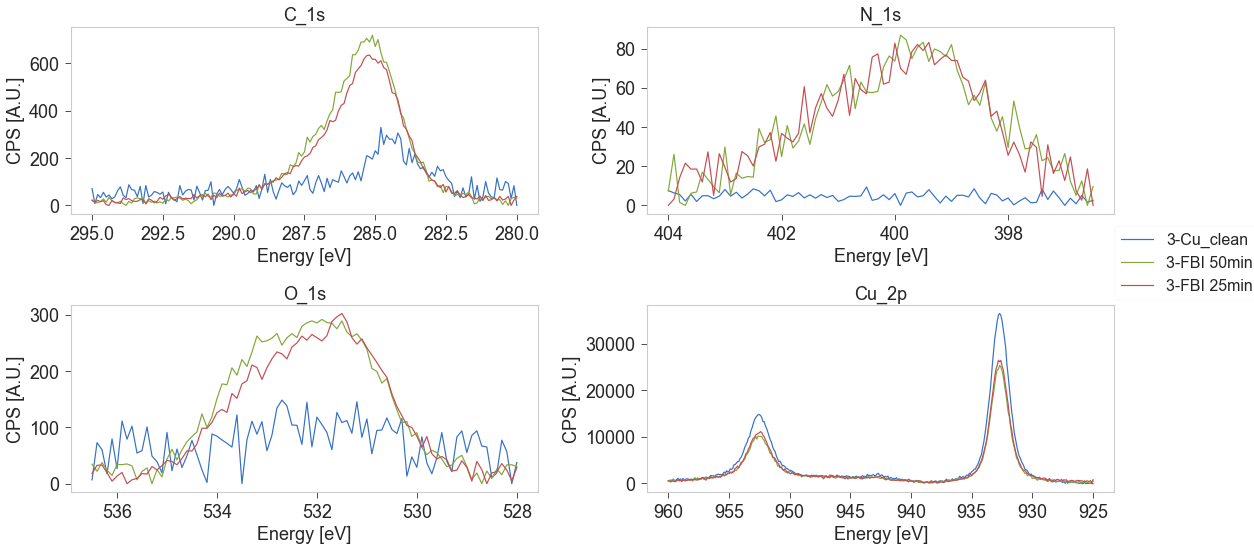

In [186]:
regions = ['C_1s', 'N_1s', 'O_1s', 'Cu_2p']

ax = plot_xp_regions(unscaled_exps[4:7], regions, ncols=2)

## Cu attenuation plots

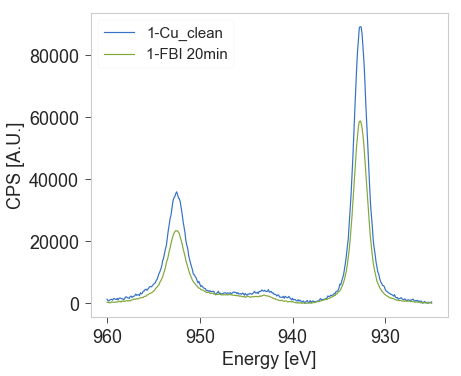

In [188]:
plot_region(bg_exps[0], region)
plot_region(bg_exps[1], region)
cosmetics_plot()

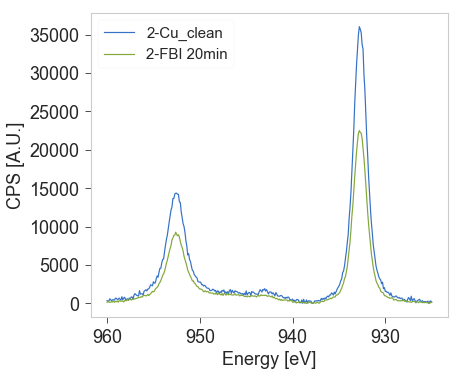

In [191]:
plot_region(bg_exps[3], region)
plot_region(bg_exps[2], region)
cosmetics_plot()

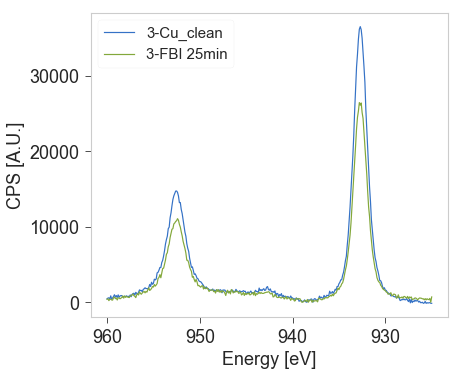

In [193]:
plot_region(bg_exps[6], region)
plot_region(bg_exps[4], region)
cosmetics_plot()

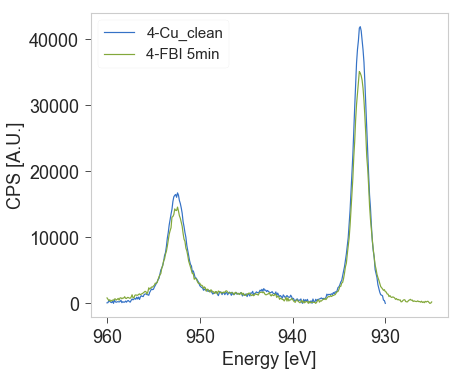

In [194]:
plot_region(bg_exps[8], region)
plot_region(bg_exps[7], region)
cosmetics_plot()

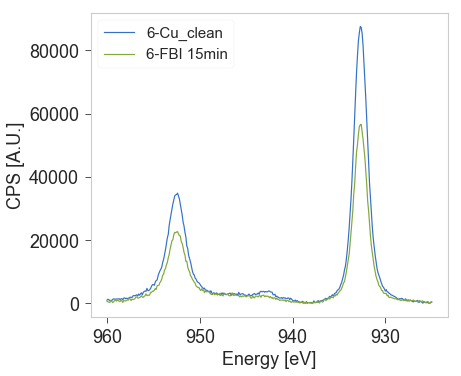

In [196]:
plot_region(bg_exps[15], region)
plot_region(bg_exps[14], region)
cosmetics_plot()

In [27]:
If = np.trapz(xpf.dfx[region].dropna().counts, dx=0.1)
I0 = np.trapz(xp0.dfx[region].dropna().counts, dx=0.1)
from invisible_cities.core.system_of_units import nm
mfp = 3.85 * nm
costh = np.cos(10*np.pi/180)

thick = mfp/costh*np.log(I0/If)
thick / nm
# np.log(I0/If+1)

3.702775993853286

In [59]:
xpf = bg_exps[4]
xp0 = bg_exps[3]
If = np.trapz(xpf.dfx[region].dropna().counts, dx=0.1)
I0 = np.trapz(xp0.dfx[region].dropna().counts, dx=0.1)
from invisible_cities.core.system_of_units import nm
mfp = 3.85 * nm
costh = np.cos(10*np.pi/180)

thick = mfp/costh*np.log(I0/If)
thick / nm
# np.log(I0/If+1)

0.980535398861882

## Results for FBI sublimated on Cu

In [10]:
from invisible_cities.core.system_of_units import nm
mfp = 3.85 * nm

In [11]:
thick1 = layer_thickness(unscaled_exps[1], unscaled_exps[0], 'Cu_2p', mfp, takeoff = 10)
thick1

(1.5786763131453027e-06, 1.0421043337017841e-08)

In [202]:
thick2 = layer_thickness(unscaled_exps[2], unscaled_exps[3], 'Cu_2p', mfp, takeoff = 10)
thick2

(1.784162411036942, 0.017052911409008078)

In [204]:
thick3= layer_thickness(unscaled_exps[6], unscaled_exps[4], 'Cu_2p', mfp, takeoff = 10)
thick3

(1.033456296427833, 0.016006497963910942)

In [207]:
thick4 = layer_thickness(unscaled_exps[7], unscaled_exps[8], 'Cu_2p', mfp, takeoff = 10)
thick4

(0.3447798871629809, 0.014712682546233357)

In [206]:
thick5 = layer_thickness(unscaled_exps[13], unscaled_exps[9], 'Cu_2p', mfp, takeoff = 10)
# unscaled_exps[9].name, unscaled_exps[13].name
thick5

(1.7328325710963486, 0.016436099856358622)

In [208]:
thick6 = layer_thickness(unscaled_exps[14], unscaled_exps[15], 'Cu_2p', mfp, takeoff = 10)
thick6

(1.549589379411192, 0.01089409103690863)

In [210]:
print('%.2e ± %.2e molecules in 1 mm2 area' %n_ml(thick2) )

4.20e+12 ± 4.01e+10 molecules in 1 mm2 area


In [211]:
print('%.2e ± %.2e molecules in 1 mm2 area' %n_ml(thick3) )

2.43e+12 ± 3.77e+10 molecules in 1 mm2 area


In [212]:
print('%.2e ± %.2e molecules in 1 mm2 area' %n_ml(thick4) )

8.12e+11 ± 3.46e+10 molecules in 1 mm2 area


In [213]:
print('%.2e ± %.2e molecules in 1 mm2 area' %n_ml(thick5))

4.08e+12 ± 3.87e+10 molecules in 1 mm2 area


In [214]:
print('%.2e ± %.2e molecules in 1 mm2 area' %n_ml(thick6) )

3.65e+12 ± 2.56e+10 molecules in 1 mm2 area


# Transport Mean Free Path
$$\lambda_t = \left(N \displaystyle\sum_{k=1}^n x_k \sigma_{t,k} \right)^{-1},$$
where $N$ is the density of atoms in the solid, $x_k$ is the atom fraction of the kth species having a Transport Cross Section (TCS) $\sigma_{t,k}$

Ref:  C.J. Powell, A. Jablonski "Surface sensitivity of X-ray photoelectron spectroscopy", Nuclear Instruments and Methods in Physics Research A 601 (2009) 54–65, doi:10.1016/j.nima.2008.12.103


In [2]:
from invisible_cities.core.system_of_units import nm, m2

In [3]:
a02 = 2.8e-21 * m2
sigma_C = 1.047 * a02 # With initial e- energy 286 eV
sigma_O = 5.908 * a02 # With initial e- energy 532 eV
sigma_N = 0.769 * a02 # With initial e- energy 400 eV
sigma_H = 0.315 * a02 # With initial e- energy 100 eV

In [4]:
tot = 31 + 35 + 3 + 5
x_C = 31/tot
x_O = 5/tot
x_N = 3/tot
x_H = 35/tot
x_C, x_O, x_N, x_H

(0.4189189189189189,
 0.06756756756756757,
 0.04054054054054054,
 0.47297297297297297)

In [ ]:
/C0.42/H0.47/O.06/N.04

## Estimate N atomic density

In [8]:
r_fbi = 0.683 * nm   # from Fernando's calculation, globularity 1
V_fbi = r_fbi**3 * 4/3* np.pi

V_fov = 4/3*np.pi          # Assume an homogeneous layer of radius 1 mm

N_molecs = V_fov / V_fbi # Molecs per mm3
print('%.2e molecs per µm3' %(N_molecs / 1e9))
print('%.2e molecs per cm3' %(N_molecs * 1e3))

3.14e+09 molecs per µm3
3.14e+21 molecs per cm3


## TRMFP

In [9]:
suma = sigma_C*x_C + sigma_O*x_O + sigma_N*x_N + sigma_H*x_H
trmfp = 1/(N_molecs * suma)
trmfp / nm

111.78244310197367

In [10]:
suma / nm / nm

0.0028502864864864874

# Calculate single-scattering albedo:
$$\omega = \frac{\lambda_{in} }{\lambda_{in} + \lambda_t } $$

Ref: Cedric Powell "Practical guide for IMFP, EAL, MED and ID in XPS",

J. Vac. Sci. Techol. A 38, 023209 (2020); 

https://doi.org/10.116/1.5141079

## Cu 2p: $\lambda_{in}$ = 1.88 nm

In [12]:
mfp_cu = 1.886 * nm

In [19]:
w_cu = mfp_cu/(mfp_cu + trmfp)
w_cu

0.01636712437034625

## Si 2p: $\lambda_{in}$ = 3.94 nm

In [20]:
mfp_si = 3.94 * nm

In [22]:
w_si = mfp_si/(mfp_si + trmfp)
w_si

0.03404698254190939

## In 3d: $\lambda_{in}$ = 3.12 nm

In [13]:
mfp_in = 3.12 * nm

In [14]:
w_in = mfp_in/(mfp_in + trmfp)
w_in

0.027153469637116956

## Au 4f: $\lambda_{in}$ = 3.97 nm

In [26]:
mfp_au = 3.97 * nm

In [27]:
w_au = mfp_au/(mfp_au + trmfp)
w_au

0.03429733225157568

# Effective Attenuation Length EAL
$$ L_{TH} = \lambda_{in}(1-0.738\omega) $$

See previous ref

If elastic scattering effects are taken into account:
$$ I_f = I_0 \exp{\left(-\frac{d_A \cos\theta}{L_{TH}} \right)}, $$


## Cu 2p: EAL 1.85 nm

In [23]:
mfp_cu = 1.88 * nm

In [24]:
eal_cu = mfp_cu*(1-0.738*w_cu)
eal_cu / nm , mfp_cu / nm

(1.8572915969636066, 1.88)

In [26]:
(mfp_cu - eal_cu)/mfp_cu

0.012078937785315583

##### 1% error

## Si 2p: EAL 3.84 nm

In [27]:
mfp_si = 3.94 * nm

In [30]:
eal_si = mfp_si*(1-0.738*w_si)
eal_si / nm , mfp_si / nm

(3.841000907923239, 3.94)

In [31]:
(mfp_si - eal_si)/mfp_si

0.025126673115929078

##### 2.5 % error

## In 3d: EAL 3.05 nm

In [15]:
mfp_in = 3.12 * nm

In [16]:
eal_in = mfp_in*(1-0.738*w_in)
eal_in / nm , mfp_in / nm

(3.05747750695236, 3.12)

In [17]:
(mfp_in - eal_in)/mfp_in

0.020039260592192333

##### 2 % error

## Au 4f: EAL 3.87 nm

In [28]:
mfp_au = 3.977 * nm

In [29]:
eal_au = mfp_au*(1-0.738*w_au)
eal_au / nm , mfp_au / nm

(3.876336438110986, 3.9769999999999994)

In [30]:
(mfp_au - eal_au)/mfp_au

0.025311431201662966

##### 2.5 % error

# MED and ID: 

## MED
$$ D = \lambda_{in} \cos\alpha(1-0.736\omega) $$
With $\alpha$ is the phtoelectron emission angle wrt the surface normal (takeoff angle)

In [32]:
costh = np.cos(10*np.pi/180)

D = mfp_cu*costh*(1-0.736*w_cu)
D / nm

1.8291357697450488

## ID
The Information Depth (ID) $\Sigma$ is the depth from which $P$\% of the detected signal originates:
$$ \Sigma = \lambda_{in}\cos\alpha \log\left[ \frac{1}{1-P/100} \right] $$

This expression is valid only if elastic-scattering effects are neglected. Otherwise the average ID, $S$ is

$$ S = \Sigma(1-0.787\omega) $$

In [33]:
P = 0.99
ID = mfp_cu * costh * np.log(1/(1-P))
ID / nm

8.526189729831279

In [34]:
S = ID*(1-0.787*w_cu)
S / nm

8.416364503360898

# For BaCl$_2$

For Cu 2p energy (554.5 eV),

TTP2M yields IMFP = 14.70 Å (from TPP2M sw compound database # 203 )

16 valence atoms, 206 amu atomic mass, 3.86 g/cm3, 0 band gap energy

For In 3d energy (1041.6 eV),

TTP2M yields IMFP = 23.62 Å (from compound database)

For Au 4f energy (1402.6 eV),

TTP2M yields IMFP = 29.80 Å (from compound database)

In [19]:
mfp_bacl = 1.47 * nm

In [21]:
mfp_bacl_au = 2.98 * nm

## TRMFP
From SESSA (Sample -> Substrate: Cu, Layer 1: BA/CL2/ -> Parameters)

In [17]:
trmfp_bacl = 12.5091 * nm

## Single scattering albedo

In [20]:
w_bacl = mfp_bacl/(mfp_bacl + trmfp_bacl)
w_bacl

0.10515698435521599

In [22]:
w_bacl_au = mfp_bacl_au/(mfp_bacl_au + trmfp_bacl)
w_bacl_au

0.19239336049221709

## EAL Cu 2p = 1.35 nm, EAL Au 4f = 2.55 nm

In [23]:
eal_bacl = mfp_bacl*(1-0.738*w_bacl)
eal_bacl / nm , mfp_bacl / nm

(1.3559193939524006, 1.47)

In [25]:
eal_bacl_au = mfp_bacl_au*(1-0.738*w_bacl_au)
eal_bacl_au / nm , mfp_bacl_au / nm

(2.556880825871097, 2.98)

# For NaCl

For Cu 2p energy (554.5 eV),

TTP2M yields IMFP = 18.64 Å (from TPP2M compound database #414)

8 valence atoms, 58.4 amu atomic mass, 2.17 g/cm3, 7.42 band gap energy

For Au 4f energy (1402.5 eV),

TTP2M yields IMFP = 38.12 Å (from TPP2M compound database #414)

# For Squarate ($C_4O_4^{2-}$)

For Cu 2p energy with Mg K-alpha radiation (320.6 eV),

TTP2M yields IMFP = [ [0.609, 0.616, 0.638, 2.429]]

40 valence atoms, 112 amu atomic mass, 3.86 g/cm3, [0, 5, 10, 50] band gap energy

Density calculated for a cell of 8 molecules in a 1.4 x 1.4 nm2 area and a thickness of 1 Å

In [2]:
be = 933
mgal = 1253.6
ke = mgal - be
ke

320.5999999999999

In [3]:
mass = 4*12 + 4*16  # amu
mass

112

In [1]:
eC = 4
eO = 6

eSQ = 4*eC + 4*eO
eSQ

40

In [5]:
# Suppose a thickness of 0.1 nm
nm = 1e-7 # cm
density = 8*mass * 1.66054e-24 / (1.4 * 0.1 * nm**3)  # g / cm3
density

10.627456000000002

In [12]:
Eg = [0, 5, 10, 50] # Band gap energy in eV
imfp = np.array([0.609, 0.616, 0.638, 2.429])  # IMFP in nm

In [14]:
# 79 % Cu 2p attenuation:
I_ratio = 1/0.79
thick = imfp*np.log(I_ratio)
thick

array([0.1435549 , 0.14520496, 0.15039085, 0.57256955])

In [17]:
1.85 * np.log(I_ratio) / 0.6

0.7268105283566318

##### Their fit to O 1s have components 
531.4 eV for C - O / = O

533.4 eV for C - OH

##### Fit to C 1s is on 

286.3 ± 0.1 eV for C-O / C=O

287.0 for C-OH

# For APTES

Formula: $C_9H_{23}NO_3Si$

Boiling point: 217 °C; Melting point: −70 °C (−94 °F; 203 K)

Molar mass: 221.372 g·mol−1

Density: 0.946 g/mL (https://www.gelest.com/product/sia0610-0/), (https://www.sigmaaldrich.com/ES/es/product/aldrich/440140?context=product)

Molec density (SESSA) = 4.96e22 #/mL

In [12]:
Na = 6.022e23
pred_rho = 4.96e22 / Na * 221
factor = 0.946/pred_rho
pred_rho, factor

(18.20259050149452, 0.051970624726317326)

##### Number of electrons

In [2]:
eC = 4
eO = 6
eH = 1
eN = 5
eSi = 4
eAPTES = 9*eC + 23*eH + 1*eN + 3*eO + eSi
eAPTES

86

##### Molar mass

In [5]:
wC = 12
wO = 16
wH = 1
wN = 14
wSi = 28
wAPTwS = 9*wC + 23*wH + 1*wN + 3*wO + wSi
wAPTwS

221

## IMFP =  28.78 Å  for E = 1041.6 eV (In 3d 5/2) (TPP2M)

IMFP 17.39 Å for E = 544 eV (Cu 2p)


## Reacted APTES

Formula: $C_3H_8NO_3Si$

Boiling point: 217 °C; Melting point: −70 °C (−94 °F; 203 K)

Molar mass: 134 g·mol−1

Density: 0.568 g/mL (estimated)

Molec density (SESSA) = 4.91e22 #/cm3

In [14]:
Na = 6.022e23
pred_rho2 = 4.91e22 / Na * 134

pred_rho2, pred_rho2 * factor, pred_rho

(10.925606110926601, 0.5678105750985257, 18.20259050149452)

##### Number of electrons

In [3]:
eC = 4
eO = 6
eH = 1
eN = 5
eSi = 4
erAPTES = 3*eC + 8*eH + 1*eN + 3*eO + eSi
erAPTES

47

##### Molar mass

In [4]:
wC = 12
wO = 16
wH = 1
wN = 14
wSi = 28
wrAPTwS = 3*wC + 8*wH + 1*wN + 3*wO + wSi
wrAPTwS

134

## Reacted APTES: IMFP =  29.68 Å  for E = 1041.6 eV (In 3d 5/2) (TPP2M)
Not a huge change with respect to unreacted.

- Checked for same bulk density as unreacted (0.946 g/mL) and estimated from constant number density and different molar mass: 0.568 g/mL. Almost same result


# For AUTES

Formula: $C_{17}H_{39}NO_3Si$

Molar mass: 333.59 g·mol−1

Density: 0.895 g/mL
(https://www.gelest.com/product/SIA0630.0/)

In [16]:
eC = 4
eO = 6
eH = 1
eN = 5
eSi = 4
eAUTES = 17*eC + 39*eH + 1*eN + 3*eO + eSi
eAUTES

134

In [22]:
wC = 12
wO = 16
wH = 1
wN = 14
wSi = 28
wAUTES = 17*wC + 39*wH + 1*wN + 3*wO + wSi
wAUTES

333

## IMFP =  29.02 Å  for E = 1041.6 eV (In 3d 5/2) (TPP2M)

# Ru++ fluorophore IMFP = 2.83 nm (SESSA)
For E = 1041.6 eV (In 3d 5/2)

$$[C_{32}H_{24}N_6O_4Ru]^{++}$$

Molar mass: 657 g/mol

Density: No data

In [23]:
wRu = 101
wRuf = 32*wC + 24*wH + 6*wN + 4*wO + wRu
wRuf

657

### Error concentration measurement

In [2]:
import numpy as np

In [1]:
M = 657
uC = np.sqrt( (1/10*1e-6/M)**2 +  )

SyntaxError: invalid character in identifier (<ipython-input-1-bdb7f23f64a2>, line 1)

In [5]:
C = 1e-4/M/1e-3
C # mol/L

0.00015220700152207

# Ir+ fluorophore IMFP = 2.78 nm (SESSA)
For E = 1041.6 eV (In 3d 5/2)

$$[C_{34}H_{24}N_4O_4Ir]^+$$
Molar mass: 744 g/mol

In [24]:
wIr = 192
wIrf = 34*wC + 24*wH + 4*wN + 4*wO + wIr
wIrf

744

# Acid-DecFBI IMFP = 1.96 nm (SESSA)
For E = 1041.6 eV (In 3d 5/2)

(Decapitated FBI + acid group linker)
$$[C_{20}H_{12}N_2O_2Br]$$

Molar mass: 392 g/mol

Valence electrons: 121

Density (assuming same radius as FBI): 0.395 g/mol

In [29]:
eBr = 7
edecFBI = 20*eC + 12*eH + 2*eN + 2*eO + eBr
edecFBI

121

In [30]:
wBr = 79.9
wdecFBI = 20*wC + 12*wH + 2*wN +2*wO + wBr
wdecFBI

391.9

##### Mass density

In [31]:
Na = 6.023e23
M = 392     # [g/mol] molar mass
R = 7.33e-8 # cm or 0.733 nm, from Fernando's calculation, globularity 1
rho = M/Na/(4*np.pi/3*R**3)
rho    # g / cm3

0.39452331225485626

##  IMFP = 34.09 Å (TPP2M)
For E = 1041.6 eV (In 3d 5/2)

Very similar result to 31.12 Å for FBI


In [32]:
l1 = 19.4
l2 = 20.0
lm = 19.5
(l1 + l2)/2

19.7

# Tectomer  IMFP = 3.88 nm (TPP2M) IMFP = 2.93 nm (SESSA)
2-tailed oligoglycine)

C8H16(-CH2-NH-(C2H5NO2)5)2 * 2 HCl

For E = 1041.6 eV (In 3d 5/2)

Assume ρ = 3 g/cm3

Molar mass: 944 g/mol

Valence electrons: 380

In [4]:
eC = 4
eO = 6
eH = 1
eN = 5
eTect = 32*eC + 72*eH + 12*eN + 20*eO
eTect

380

In [5]:
wC = 12
wO = 16
wH = 1
wN = 14
wTwct = 32*wC + 72*wH + 12*wN + 20*wO
wTwct

944

# Acid-DecFBI IMFP = 1.96 nm (SESSA)
For E = 1041.6 eV (In 3d 5/2)

(Decapitated FBI + acid group linker)
$$[C_{20}H_{12}N_2O_2Br]$$

Molar mass: 392 g/mol

Valence electrons: 121

Density (assuming same radius as FBI): 0.395 g/mol

# FBI-G3

## Parameters for TPP2M calculation

##### Valence Electrons

In [1]:
eC = 4
eO = 6
eH = 1
eN = 5

eFBI = 38*eC + 35*eH + 3*eN + 5*eO
eFBI

232

##### Atomic mass

In [3]:
wC = 12
wO = 16
wH = 1
wN = 14

wFBIg3 = 38*wC + 42*wH + 3*wN + 5*wO
wFBIg3

620

##### Gap energy: assume same as STM measurement, 3.0 eV

##### Bulk density: assume molecular radius same as FBI-G1

In [6]:
Na = 6.023e23
M = 620     # [g/mol] molar mass
R = 7.33e-8 # cm or 0.733 nm, from Fernando's calculation, globularity 1
rho = M/Na/(4*np.pi/3*R**3)
rho    # g / cm3

0.6239909530561502

##### Au 4f 5/2 (1402.6 eV): TPP-2M formula yields $\lambda_{in}$ = 38.93 Å
This takes into account E$_{gap}$ = 3.0 eV.  (STM measurement)

Mind also that 1402.61 is the KE corresponding to BE = 84 eV (Au 4f 5/2) for Al K $\alpha$ radiation of 1486.6 eV

## Transport Mean Free Path
$$\lambda_t = \left(N \displaystyle\sum_{k=1}^n x_k \sigma_{t,k} \right)^{-1},$$
where $N$ is the density of atoms in the solid, $x_k$ is the atom fraction of the kth species having a Transport Cross Section (TCS) $\sigma_{t,k}$

Ref:  C.J. Powell, A. Jablonski "Surface sensitivity of X-ray photoelectron spectroscopy", Nuclear Instruments and Methods in Physics Research A 601 (2009) 54–65, doi:10.1016/j.nima.2008.12.103


In [7]:
from invisible_cities.core.system_of_units import nm, m2

In [8]:
a02 = 2.8e-21 * m2
sigma_C = 1.047 * a02 # With initial e- energy 286 eV
sigma_O = 5.908 * a02 # With initial e- energy 532 eV
sigma_N = 0.769 * a02 # With initial e- energy 400 eV
sigma_H = 0.315 * a02 # With initial e- energy 100 eV

In [11]:
tot = 38 + 42 + 3 + 5
x_C = 31/tot
x_O = 5/tot
x_N = 3/tot
x_H = 35/tot
x_C, x_O, x_N, x_H

(0.3522727272727273,
 0.056818181818181816,
 0.03409090909090909,
 0.3977272727272727)

In [ ]:
/C0.38/H0.43/O.06/N.04

## Estimate N atomic density

In [12]:
r_fbi = 0.683 * nm   # from Fernando's calculation, globularity 1
V_fbi = r_fbi**3 * 4/3* np.pi

V_fov = 4/3*np.pi          # Assume an homogeneous layer of radius 1 mm

N_molecs = V_fov / V_fbi # Molecs per mm3
print('%.2e molecs per µm3' %(N_molecs / 1e9))
print('%.2e molecs per cm3' %(N_molecs * 1e3))

3.14e+09 molecs per µm3
3.14e+21 molecs per cm3


## TRMFP

In [13]:
suma = sigma_C*x_C + sigma_O*x_O + sigma_N*x_N + sigma_H*x_H
trmfp = 1/(N_molecs * suma)
trmfp / nm

132.93047287802275

In [10]:
suma / nm / nm

0.0028502864864864874

## Calculate single-scattering albedo:
$$\omega = \frac{\lambda_{in} }{\lambda_{in} + \lambda_t } $$

Ref: Cedric Powell "Practical guide for IMFP, EAL, MED and ID in XPS",

J. Vac. Sci. Techol. A 38, 023209 (2020); 

https://doi.org/10.116/1.5141079

### Au 4f: $\lambda_{in}$ = 3.97 nm

In [14]:
mfp_au = 3.89 * nm

In [15]:
w_au = mfp_au/(mfp_au + trmfp)
w_au

0.028431417595435344

## Effective Attenuation Length EAL
$$ L_{TH} = \lambda_{in}(1-0.738\omega) $$

See previous ref

If elastic scattering effects are taken into account:
$$ I_f = I_0 \exp{\left(-\frac{d_A \cos\theta}{L_{TH}} \right)}, $$


### Au 4f: EAL 3.80 nm

In [16]:
mfp_au = 3.89 * nm

In [17]:
eal_au = mfp_au*(1-0.738*w_au)
eal_au / nm , mfp_au / nm

(3.8083785177386726, 3.89)

In [19]:
(mfp_au - eal_au)/mfp_au

0.020982386185431214

# ANN205-SL
C70 H87 Cl Ir N9 O13 Si2

## Parameters for TPP2M calculation

##### Valence Electrons

In [7]:
eC = 4
eO = 6
eH = 1
eN = 5
eIr = 9
eSi = 4

eANN = 70*eC + 87*eH + 9*eN + 13*eO + 2*eSi + eIr
eANN

507

##### Atomic mass

In [8]:
wC = 12
wO = 16
wH = 1
wN = 14
wSi = 28
wIr = 192

wANN = 70*wC + 87*wH + 9*wN + 13*wO + 2*wSi + wIr
wANN

1509

##### Gap energy: assume same as STM measurement, 3.0 eV

##### Bulk density: assume molecular radius same as FBI-G1

In [11]:
Na = 6.023e23
M = 620     # [g/mol] molar mass
V = 1.4*0.76*1.19 * (1e-8)**3 #cm3
rho = M/Na/V
rho    # g / cm3

812.9994222668752

##### Results are around 0.01 Å for any energy (nonsense), use SESSA:
Si 2p:

IMFP = 36.3 Å, EMFP = 82.7 Å, TRMP = 1203.1 Å

Au 4f 5/2:

IMFP = 36.6 Å, EMFP = 823.4 Å, TRMP = 1224.1 Å

Cu 3p 3/2:

IMFP = 36.8 Å, EMFP = 83.9 Å, TRMP = 1236.3 Å

##### Single Scattering Albedo

In [14]:
mfp_si = 36.3
trmfp_si = 1203

In [15]:
w_si = mfp_si/(mfp_si + trmfp_si)

##### EAL
Si 2p: 35.5 Å

In [16]:
eal_si = mfp_si*(1-0.738*w_si)
eal_si

35.515318954248364